# Feature

In [1]:
import pandas as pd
from backtesting.lib import OHLCV_AGG
import numpy as np
import talib as ta

df = pd.read_csv(f"TXF_1min_one_year.csv", index_col=0)

df.index = pd.to_datetime(df.index)
df= df.between_time('08:44:00', '04:00:01')
df_resample = df.resample('5T', label='right', closed='right').agg(
    {'Open'  :'first',
     'High'  :'max',
     'Low'   :'min',
     'Close' :'last',
     'Volume':'sum'
    })
df_resample.dropna(axis=0, inplace=True)
all_time_df = df_resample

# Model parameters
columns_to_drop = ['close_last1', 'close_last2', 'close_last3', 'close_last4', 'close_last5', 'high_last1', 'high_last2',
                    'high_last3', 'high_last4', 'high_last5', 'low_last1', 'low_last2', 'low_last3', 'low_last4', 'low_last5',
                    'vol_last1', 'vol_last2', 'vol_last3', 'vol_last4', 'vol_last5']
columns_to_scale = ['vol_mom1', 'vol_mom2', 'vol_mom3', 'vol_mom4', 'vol_mom5', 'MACD', 'RSI', 'close_mom1',
                    'close_mom2', 'close_mom3', 'close_mom4', 'close_mom5']
columns_input = ['vol_mom1', 'vol_mom2', 'vol_mom3', 'vol_mom4', 'vol_mom5', 'MACD', 'RSI', 'low_diff1',
                'low_diff2', 'low_diff3', 'low_diff4', 'low_diff5', 'close_mom1', 'close_mom2', 'close_mom3', 'close_mom4',
                 'close_mom5', 'close_diff1', 'close_diff2', 'close_diff3', 'close_diff4', 'close_diff5', 'high_diff1',
                 'high_diff2', 'high_diff3', 'high_diff4', 'high_diff5']
time_window = 10
label_price_diff = 40

all_time_df['vol_last1'] = all_time_df['Volume'].shift(1)
all_time_df['vol_last2'] = all_time_df['Volume'].shift(2)
all_time_df['vol_last3'] = all_time_df['Volume'].shift(3)
all_time_df['vol_last4'] = all_time_df['Volume'].shift(4)
all_time_df['vol_last5'] = all_time_df['Volume'].shift(5)
all_time_df['vol_mom1'] = all_time_df['Volume'] - all_time_df['vol_last1']
all_time_df['vol_mom2'] = all_time_df['Volume'] - all_time_df['vol_last2']
all_time_df['vol_mom3'] = all_time_df['Volume'] - all_time_df['vol_last3']
all_time_df['vol_mom4'] = all_time_df['Volume'] - all_time_df['vol_last4']
all_time_df['vol_mom5'] = all_time_df['Volume'] - all_time_df['vol_last5']
a, b, all_time_df['MACD'] = ta.MACD(all_time_df['Close'])
# all_time_df['MACD_last'] = all_time_df['MACD'].shift(1)
all_time_df['RSI'] = ta.RSI(all_time_df['Close'], 14)
# all_time_df['RSI_last'] = all_time_df['RSI'].shift(1)
all_time_df['low_last1'] = all_time_df['Low'].shift(1)
all_time_df['low_last2'] = all_time_df['Low'].shift(2)
all_time_df['low_last3'] = all_time_df['Low'].shift(3)
all_time_df['low_last4'] = all_time_df['Low'].shift(4)
all_time_df['low_last5'] = all_time_df['Low'].shift(5)
all_time_df['high_last1'] = all_time_df['High'].shift(1)
all_time_df['high_last2'] = all_time_df['High'].shift(2)
all_time_df['high_last3'] = all_time_df['High'].shift(3)
all_time_df['high_last4'] = all_time_df['High'].shift(4)
all_time_df['high_last5'] = all_time_df['High'].shift(5)
all_time_df['close_last1'] = all_time_df['Close'].shift(1)
all_time_df['close_last2'] = all_time_df['Close'].shift(2)
all_time_df['close_last3'] = all_time_df['Close'].shift(3)
all_time_df['close_last4'] = all_time_df['Close'].shift(4)
all_time_df['close_last5'] = all_time_df['Close'].shift(5)
all_time_df['low_diff1'] = all_time_df.apply(lambda row: 1 if row['Low'] > row['low_last1'] else -1, axis=1)
all_time_df['low_diff2'] = all_time_df.apply(lambda row: 1 if row['low_last1'] > row['low_last2'] else -1, axis=1)
all_time_df['low_diff3'] = all_time_df.apply(lambda row: 1 if row['low_last2'] > row['low_last3'] else -1, axis=1)
all_time_df['low_diff4'] = all_time_df.apply(lambda row: 1 if row['low_last3'] > row['low_last4'] else -1, axis=1)
all_time_df['low_diff5'] = all_time_df.apply(lambda row: 1 if row['low_last4'] > row['low_last5'] else -1, axis=1)
all_time_df['close_mom1'] = all_time_df['Close'] - all_time_df['Close'].shift(1)
all_time_df['close_mom2'] = all_time_df['Close'] - all_time_df['Close'].shift(2)
all_time_df['close_mom3'] = all_time_df['Close'] - all_time_df['Close'].shift(3)
all_time_df['close_mom4'] = all_time_df['Close'] - all_time_df['Close'].shift(4)
all_time_df['close_mom5'] = all_time_df['Close'] - all_time_df['Close'].shift(5)
all_time_df['close_diff1'] = all_time_df.apply(lambda row: 1 if row['Close'] > row['close_last1'] else -1, axis=1)
all_time_df['close_diff2'] = all_time_df.apply(lambda row: 1 if row['close_last1'] > row['close_last2'] else -1, axis=1)
all_time_df['close_diff3'] = all_time_df.apply(lambda row: 1 if row['close_last2'] > row['close_last3'] else -1, axis=1)
all_time_df['close_diff4'] = all_time_df.apply(lambda row: 1 if row['close_last3'] > row['close_last4'] else -1, axis=1)
all_time_df['close_diff5'] = all_time_df.apply(lambda row: 1 if row['close_last4'] > row['close_last5'] else -1, axis=1)
all_time_df['high_diff1'] = all_time_df.apply(lambda row: 1 if row['High'] > row['high_last1'] else -1, axis=1)
all_time_df['high_diff2'] = all_time_df.apply(lambda row: 1 if row['high_last1'] > row['high_last2'] else -1, axis=1)
all_time_df['high_diff3'] = all_time_df.apply(lambda row: 1 if row['high_last2'] > row['high_last3'] else -1, axis=1)
all_time_df['high_diff4'] = all_time_df.apply(lambda row: 1 if row['high_last3'] > row['high_last4'] else -1, axis=1)
all_time_df['high_diff5'] = all_time_df.apply(lambda row: 1 if row['high_last4'] > row['high_last5'] else -1, axis=1)
# all_time_df['price_diff'] = all_time_df['Close'] - all_time_df['Open']
# all_time_df['max_min'] = all_time_df['High'] - all_time_df['Low']
# all_time_df['max_min_last'] = all_time_df['max_min'].shift(1)
# all_time_df['max_min_diff'] = all_time_df['max_min'] - all_time_df['max_min_last']
# all_time_df['max_min_diff'] = all_time_df.apply(lambda row: row['High'] - row['Low'] if row['price_diff'] > 0 else row['Low'] - row['High'], axis=1)

all_time_df = all_time_df.drop(columns_to_drop, axis=1)
print(all_time_df.columns)
print(all_time_df.shape)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'vol_mom1', 'vol_mom2',
       'vol_mom3', 'vol_mom4', 'vol_mom5', 'MACD', 'RSI', 'low_diff1',
       'low_diff2', 'low_diff3', 'low_diff4', 'low_diff5', 'close_mom1',
       'close_mom2', 'close_mom3', 'close_mom4', 'close_mom5', 'close_diff1',
       'close_diff2', 'close_diff3', 'close_diff4', 'close_diff5',
       'high_diff1', 'high_diff2', 'high_diff3', 'high_diff4', 'high_diff5'],
      dtype='object')
(52704, 32)


# Scale

In [3]:
from sklearn.preprocessing import StandardScaler
import pickle
all_time_df = all_time_df[all_time_df.index >= '2022-05-20 00:00:00']     # 移除第一天
df = all_time_df.copy()
df_train = df[df.index < '2023-01-20 08:50:00']
df_test = df[df.index >= '2023-01-20 08:50:00']

scaler = StandardScaler()
all_time_df[columns_to_scale] = scaler.fit_transform(all_time_df[columns_to_scale])
print(all_time_df)
all_time_df.to_csv("df.csv")

with open('scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

                        Open     High      Low    Close  Volume  vol_mom1   
2022-05-20 00:00:00  16006.0  16011.0  15993.0  16009.0    1114  0.483951  \
2022-05-20 00:05:00  16009.0  16012.0  15997.0  16001.0     547 -0.871074   
2022-05-20 00:10:00  16001.0  16007.0  15996.0  16003.0     445 -0.156690   
2022-05-20 00:15:00  16005.0  16015.0  16005.0  16010.0     466  0.032276   
2022-05-20 00:20:00  16010.0  16019.0  15999.0  16001.0     485  0.029204   
...                      ...      ...      ...      ...     ...       ...   
2023-05-19 23:40:00  16096.0  16098.0  16084.0  16089.0     712 -0.153617   
2023-05-19 23:45:00  16089.0  16096.0  16084.0  16094.0     466 -0.377918   
2023-05-19 23:50:00  16094.0  16103.0  16093.0  16097.0     553  0.133673   
2023-05-19 23:55:00  16098.0  16099.0  16093.0  16097.0     239 -0.482387   
2023-05-20 00:00:00  16096.0  16104.0  16092.0  16092.0     327  0.135209   

                     vol_mom2  vol_mom3  vol_mom4  vol_mom5  ...  close_dif

# Generate train test data

In [4]:
all_time_train = all_time_df[all_time_df.index < '2023-01-20 08:50:00']
all_time_test = all_time_df[all_time_df.index >= '2023-01-20 08:50:00']

def train_windows(x, ref_day, predict_day):
    X_train, Y_train = [], []
    start_time = pd.to_datetime('9:15:00').time()
    end_time = pd.to_datetime('13:30:01').time()
    for i in range(x.shape[0]-predict_day-ref_day):
        if (x.index[i+ref_day].time() >= start_time and x.index[i+ref_day].time() < end_time):
            plus = 0
            in_price = x.iloc[i+ref_day-1]['Close']
            # print("go in price: ", in_price, "time:", x.index[i+ref_day].time())
            while (x.index[i+ref_day+plus].time() < end_time):
                plus += 1
                if (x.iloc[i+plus+ref_day]['Close'] - in_price > label_price_diff):
                    X_train.append(np.array(x[i:i+ref_day]))
                    Y_train.append(1)
                    # print("up trend close price:", x.iloc[i+plus+ref_day]['Close'], "time:", x.index[i+ref_day+plus+1].time(), "\n")
                    break
                elif (in_price - x.iloc[i+plus+ref_day]['Close'] > label_price_diff):
                    X_train.append(np.array(x[i:i+ref_day]))
                    Y_train.append(0)
                    # print("down trend close price:", x.iloc[i+plus+ref_day]['Close'], "time:", x.index[i+ref_day+plus+1].time(), "\n")
                    break
    return np.array(X_train), np.array(Y_train)

x_train_lstm, y_train_lstm = train_windows(all_time_train, time_window, 1)
x_test_lstm, y_test_lstm = train_windows(all_time_test, time_window, 1)

x_train = x_train_lstm[:, :, 5:]     
# y_train = df_train['label']
print("train shape:", x_train.shape)

x_test = x_test_lstm[:, :, 5:]
# y_test = df_test['label']
print("test shape:", x_test.shape)

train shape: (5297, 10, 27)
test shape: (1764, 10, 27)


# Train model

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed, Flatten, SimpleRNN
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow_probability as tfp

def median_accuracy(y_true, y_pred):
    threshold = tfp.stats.percentile(y_pred, 50, interpolation='midpoint')
    y_pred_binary = tf.cast(tf.where(y_pred > threshold, 1, 0), tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred_binary), tf.float32))
    return accuracy

model = Sequential()
model.add(LSTM(256, activation="relu", input_shape=x_train.shape[1:], return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.add(Flatten())
model.add(Dense(5,activation='linear'))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10)
checkpoint = ModelCheckpoint(filepath='best_model.h5',  # 存放最佳模型的檔案名稱
                             monitor='val_accuracy',  # 監視的指標
                             save_best_only=True,  # 只保存最佳模型
                             save_weights_only=False,  # 是否只保存模型的權重
                             mode='max',  # 監視指標的模式，這裡使用 'min' 表示監視損失函數值的最小值
                             verbose=1)  # 顯示保存模型的信息

model.fit(x_train, y_train_lstm, epochs=60, batch_size=256, validation_data=(x_test, y_test_lstm), callbacks=[checkpoint, early_stopping])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 10, 256)           290816    
                                                                 
 lstm_17 (LSTM)              (None, 10, 256)           525312    
                                                                 
 time_distributed_9 (TimeDis  (None, 10, 1)            257       
 tributed)                                                       
                                                                 
 flatten_9 (Flatten)         (None, 10)                0         
                                                                 
 dense_28 (Dense)            (None, 5)                 55        
                                                                 
 dense_29 (Dense)            (None, 1)                 6         
                                                      

# Load model and validation

In [5]:
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed, Flatten, SimpleRNN
from tensorflow.keras.models import Sequential

input_shape = x_train.shape[1:]

model_checkoint = Sequential()
model_checkoint.add(LSTM(256, activation="relu", input_shape=input_shape, return_sequences=True))
model_checkoint.add(LSTM(256, return_sequences=True))
model_checkoint.add(TimeDistributed(Dense(1)))
model_checkoint.add(Flatten())
model_checkoint.add(Dense(5,activation='linear'))
model_checkoint.add(Dense(1, activation="sigmoid"))
model_checkoint.load_weights('best_model.h5')

result = model_checkoint.predict(x_test)
r = pd.DataFrame(result)
r.to_csv('r_check.csv')

big = 0
small = 0
total = 0
right = 0
wrong = 0
up = 0
down = 0

median = np.median(result)
std_dev = np.std(result)
up_threshold = median+std_dev
down_threshold = median-std_dev

for i in range(len(result)):
    if result[i] > median: big += 1
    else: small += 1

    if result[i] > up_threshold:
        total += 1
        if y_test_lstm[i] == 1: right += 1
        else: wrong += 1
        up += 1
    elif result[i] < down_threshold:
        total += 1
        if y_test_lstm[i] == 0: right += 1
        else: wrong += 1
        down += 1

print("total test data: ", len(result))
print("up threshold: ", up_threshold)
print("down threshold: ", down_threshold)
print("total considered data: ", total)
print("correct predicted data: ", right)
print("accuracy: ", right/total)
print("up: ", up)
print("down: ", down)

56/56 [==============================] - 2s 25ms/step
total test data:  1764
up threshold:  0.61596316
down threshold:  0.3671736
total considered data:  564
correct predicted data:  362
accuracy:  0.6418439716312057
up:  274
down:  290


# Strategy

In [11]:
from backtesting import Strategy
from backtesting.lib import crossover
import talib as ta
from datetime import time, datetime, timedelta
# up_threshold = 0.61596316
# down_threshold = 0.3671736
class ML(Strategy): 

    stop = 20
    take = 40
    adjust = 30
    after_adjust_stop = -25

    def init(self):

        # 指標套用
        self.macd, self.macd_signal, self.macd_hist = self.I(ta.MACD, self.data.Close)
        self.rsi = self.I(ta.RSI, self.data.Close, 14)

        self.history = []

        self.stop_loss_price = 0
        self.take_profit_price = 0
        self.buy_price = 0
        self.sell_price = 0

        self.stop_point = self.stop
        self.take_point = self.take
        self.adjust_point = self.adjust
        self.after_adjust_stop_point = self.after_adjust_stop
        print("init")

    def next(self):
        # global model
        if (self.data.index[-1].time() >= time(8, 45) and (self.data.index[-1].time() < time(13, 30))):
            price_diff = self.data.Close[-1] - self.data.Open[-1]
            max_min_diff = self.data.High[-1] - self.data.Low[-1]
            low_diff1 = 1 if self.data.Low[-1] > self.data.Low[-2] else -1
            low_diff2 = 1 if self.data.Low[-2] > self.data.Low[-3] else -1
            low_diff3 = 1 if self.data.Low[-3] > self.data.Low[-4] else -1
            low_diff4 = 1 if self.data.Low[-4] > self.data.Low[-5] else -1
            low_diff5 = 1 if self.data.Low[-5] > self.data.Low[-6] else -1
            close_mom1 = self.data.Close[-1] - self.data.Close[-2]
            close_mom2 = self.data.Close[-1] - self.data.Close[-3]
            close_mom3 = self.data.Close[-1] - self.data.Close[-4]
            close_mom4 = self.data.Close[-1] - self.data.Close[-5]
            close_mom5 = self.data.Close[-1] - self.data.Close[-6]
            close_diff1 = 1 if self.data.Close[-1] > self.data.Close[-2] else -1
            close_diff2 = 1 if self.data.Close[-2] > self.data.Close[-3] else -1
            close_diff3 = 1 if self.data.Close[-3] > self.data.Close[-4] else -1
            close_diff4 = 1 if self.data.Close[-4] > self.data.Close[-5] else -1
            close_diff5 = 1 if self.data.Close[-5] > self.data.Close[-6] else -1
            high_diff1 = 1 if self.data.High[-1] > self.data.High[-2] else -1
            high_diff2 = 1 if self.data.High[-2] > self.data.High[-3] else -1
            high_diff3 = 1 if self.data.High[-3] > self.data.High[-4] else -1
            high_diff4 = 1 if self.data.High[-4] > self.data.High[-5] else -1
            high_diff5 = 1 if self.data.High[-5] > self.data.High[-6] else -1
            volume = self.data.Volume[-1]
            vol_mom1 = self.data.Volume[-1] - self.data.Volume[-2]
            vol_mom2 = self.data.Volume[-1] - self.data.Volume[-3]
            vol_mom3 = self.data.Volume[-1] - self.data.Volume[-4]
            vol_mom4 = self.data.Volume[-1] - self.data.Volume[-5]
            vol_mom5 = self.data.Volume[-1] - self.data.Volume[-6]
            macd = self.macd_hist[-1]
            rsi = self.rsi[-1]
            data = [[ vol_mom1, vol_mom2, vol_mom3, vol_mom4, vol_mom5, macd, rsi, low_diff1, low_diff2, low_diff3, low_diff4, low_diff5, close_mom1, close_mom2, close_mom3,
                      close_mom4, close_mom5, close_diff1, close_diff2, close_diff3, close_diff4, close_diff5,
                      high_diff1, high_diff2, high_diff3, high_diff4, high_diff5]]
            # print("data before: ", data)
            tmp = pd.DataFrame(data, columns=columns_input)
            tmp[columns_to_scale] = scaler.transform(tmp[columns_to_scale])
            # print("data:", list(np.array(tmp)[0]))
            self.history.append(list(np.array(tmp)[0]))
            
        if (not self.position and self.data.index[-1].time() > time(9, 15) and (self.data.index[-1].time() < time(13, 30))):
            if (len(self.history) >= time_window):
                time_index = -1 * time_window
                x_in = [self.history[time_index:]]
                # print("x_in: ", len(x_in))
                y = model_checkoint.predict(x_in, verbose=0)
                # print("label: ", y, "\n")
                if (y[0][0] > up_threshold):    
                    self.buy(size=200)
                    self.buy_price = self.data.Close[-1]  # 設定買入價格
                    self.buy_or_sell = 1 # 設定多單變數
                    print("buy ", self.data.index[-1].date(), self.data.index[-1].time(), self.buy_price)
                    # self.stop_loss_price = self.buy_price-20
                    # self.take_profit_price = self.buy_price+50
                    self.stop_point = self.stop
                    self.take_point = self.take
                    self.adjust_point = self.adjust
                    self.after_adjust_stop_point = self.after_adjust_stop
                
                elif (y[0][0] < down_threshold):
                    self.sell(size=200)
                    self.sell_price = self.data.Close[-1]  # 設定賣出價格
                    self.buy_or_sell = -1 # 設定空單變數
                    print("sell ", self.data.index[-1].date(), self.data.index[-1].time(), self.sell_price)
                    # self.stop_loss_price = self.sell_price+20
                    # self.take_profit_price = self.sell_price-50
                    self.stop_point = self.stop
                    self.take_point = self.take
                    self.adjust_point = self.adjust
                    self.after_adjust_stop_point = self.after_adjust_stop

        elif self.position:
            # 如果時間已到13:30，則平倉
            if self.data.index[-1].time() >= time(13, 30):
                self.position.close()
                print("close ", self.data.index[-1].date(), self.data.index[-1].time(), self.data.Close[-1], "\n")


            #若現為多單
            elif (self.buy_or_sell == 1): 
                # 計算止損和止盈點位
                # stop_loss_price = self.buy_price-15
                # take_profit_price = self.buy_price+40
                # 如果股價達到止盈止損點位，則平倉
                price_diff = self.data.Close[-1] - self.buy_price
                if price_diff < -1 * self.stop_point or price_diff > self.take_point:
                    self.position.close()
                    print("close take", self.data.index[-1].date(), self.data.index[-1].time(), self.data.Close[-1], "\n")
                elif price_diff > self.adjust_point:
                    self.stop_point = self.after_adjust_stop_point

            #若現為空單
            elif (self.buy_or_sell == -1): 
                # 計算止損和止盈點位
                # stop_loss_price = self.sell_price+15
                # take_profit_price = self.sell_price-40
                # 如果股價達到止盈止損點位，則平倉
                price_diff = self.data.Close[-1] - self.sell_price
                if price_diff > self.stop_point or price_diff < -1 * self.take_point:
                    self.position.close()
                    print("close take", self.data.index[-1].date(), self.data.index[-1].time(), self.data.Close[-1], "\n")
                elif price_diff < -1 * self.adjust_point:
                    self.stop_point = self.after_adjust_stop_point
            

# Backtest

#### 丟入樣本外資料進行回測

In [15]:
from backtesting import Backtest
df = pd.concat([df_train, df_test])
df_out_sample = df_test[df_test.index >= '2023-04-21 08:50:00']
bt = Backtest(df_test, ML, cash=500_000, commission=0.000033, hedging=False, exclusive_orders=False, margin=0.05)
stats = bt.run()

init
sell  2023-01-30 12:55:00 15418.0
close take 2023-01-30 13:10:00 15445.0 

sell  2023-01-30 13:20:00 15450.0
close  2023-01-30 13:30:00 15451.0 

sell  2023-01-31 11:45:00 15326.0
close take 2023-01-31 12:45:00 15305.0 

sell  2023-01-31 13:10:00 15305.0
close  2023-01-31 13:30:00 15292.0 

buy  2023-02-01 09:40:00 15368.0
close take 2023-02-01 09:55:00 15347.0 

buy  2023-02-01 10:00:00 15350.0
close take 2023-02-01 10:40:00 15326.0 

sell  2023-02-01 12:25:00 15342.0
close take 2023-02-01 13:15:00 15374.0 

sell  2023-02-02 09:20:00 15547.0
close take 2023-02-02 09:40:00 15493.0 

sell  2023-02-02 09:45:00 15485.0
close take 2023-02-02 10:05:00 15518.0 

buy  2023-02-02 10:10:00 15515.0
close take 2023-02-02 10:55:00 15557.0 

buy  2023-02-02 11:05:00 15535.0
close take 2023-02-02 11:55:00 15579.0 

buy  2023-02-03 09:20:00 15522.0
close take 2023-02-03 09:40:00 15540.0 

buy  2023-02-03 09:45:00 15532.0
close take 2023-02-03 11:15:00 15573.0 

sell  2023-02-03 12:25:00 15619.0


#### 樣本外回測結果

In [16]:
print(stats)

Start                     2023-01-30 08:50:00
End                       2023-05-20 00:00:00
Duration                    109 days 15:10:00
Exposure Time [%]                   14.188002
Equity Final [$]                  807712.8874
Equity Peak [$]                   812112.8874
Return [%]                          61.542577
Buy & Hold Return [%]                4.007239
Return (Ann.) [%]                  289.082429
Volatility (Ann.) [%]              101.048246
Sharpe Ratio                         2.860836
Sortino Ratio                       26.420038
Calmar Ratio                        48.464303
Max. Drawdown [%]                   -5.964853
Avg. Drawdown [%]                   -0.823604
Max. Drawdown Duration       14 days 00:35:00
Avg. Drawdown Duration        0 days 21:38:00
# Trades                                  201
Win Rate [%]                        53.233831
Best Trade [%]                       0.695978
Worst Trade [%]                     -0.309719
Avg. Trade [%]                    

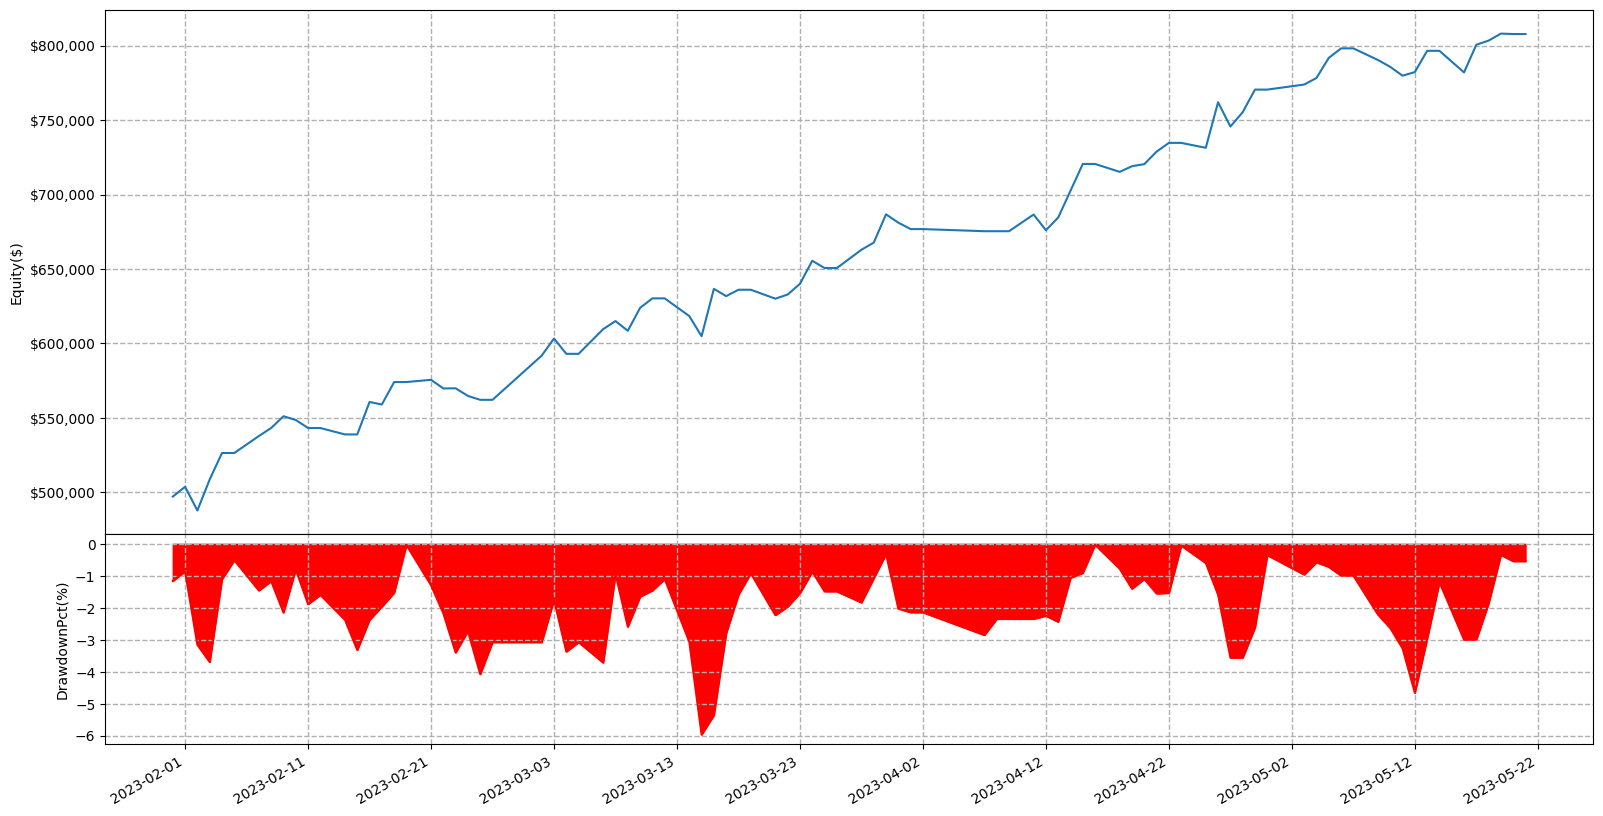

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import StrMethodFormatter
from backtesting.lib import _EQUITY_AGG

equity_data = stats._equity_curve.resample('1D', label='right').agg(_EQUITY_AGG).dropna(how='all')
equity_data['DrawdownPct'] = equity_data['DrawdownPct'].multiply(-100)

f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(19.2, 10.8), gridspec_kw={'height_ratios': [5, 2]})

ax1.grid(linestyle = '--', linewidth = 1)
ax1.plot(equity_data['Equity'])
ax1.set(ylabel="Equity($)")
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
date_form = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax2.grid(linestyle = '--', linewidth = 1)
ax2.plot(equity_data['DrawdownPct'], color="red")
ax2.set(ylabel="DrawdownPct(%)")
ax2.fill_between(equity_data['DrawdownPct'].index, equity_data['DrawdownPct'], where=(equity_data['DrawdownPct'] <= 0), color="red")   
f.subplots_adjust(hspace=0)
f.autofmt_xdate()

plt.show()

### 回測2022(train data以前)

In [35]:
import datetime
import pandas as pd
import shioaji as sj
import pysimulation
from backtesting.lib import OHLCV_AGG

df = pd.read_csv(f"TXF_1min_test_2021.csv", index_col=0)

df.index = pd.to_datetime(df.index)
df= df.between_time('08:44:00', '04:00:01')
df_resample = df.resample('5T', label='right', closed='right').agg(
    {'Open'  :'first',
     'High'  :'max',
     'Low'   :'min',
     'Close' :'last',
     'Volume':'sum'
    })
df_resample.dropna(axis=0, inplace=True)
all_time_df = df_resample

all_time_df['vol_last1'] = all_time_df['Volume'].shift(1)
all_time_df['vol_last2'] = all_time_df['Volume'].shift(2)
all_time_df['vol_last3'] = all_time_df['Volume'].shift(3)
all_time_df['vol_last4'] = all_time_df['Volume'].shift(4)
all_time_df['vol_last5'] = all_time_df['Volume'].shift(5)
all_time_df['vol_mom1'] = all_time_df['Volume'] - all_time_df['vol_last1']
all_time_df['vol_mom2'] = all_time_df['Volume'] - all_time_df['vol_last2']
all_time_df['vol_mom3'] = all_time_df['Volume'] - all_time_df['vol_last3']
all_time_df['vol_mom4'] = all_time_df['Volume'] - all_time_df['vol_last4']
all_time_df['vol_mom5'] = all_time_df['Volume'] - all_time_df['vol_last5']
a, b, all_time_df['MACD'] = ta.MACD(all_time_df['Close'])
all_time_df['RSI'] = ta.RSI(all_time_df['Close'], 14)
all_time_df['low_last1'] = all_time_df['Low'].shift(1)
all_time_df['low_last2'] = all_time_df['Low'].shift(2)
all_time_df['low_last3'] = all_time_df['Low'].shift(3)
all_time_df['low_last4'] = all_time_df['Low'].shift(4)
all_time_df['low_last5'] = all_time_df['Low'].shift(5)
all_time_df['high_last1'] = all_time_df['High'].shift(1)
all_time_df['high_last2'] = all_time_df['High'].shift(2)
all_time_df['high_last3'] = all_time_df['High'].shift(3)
all_time_df['high_last4'] = all_time_df['High'].shift(4)
all_time_df['high_last5'] = all_time_df['High'].shift(5)
all_time_df['close_last1'] = all_time_df['Close'].shift(1)
all_time_df['close_last2'] = all_time_df['Close'].shift(2)
all_time_df['close_last3'] = all_time_df['Close'].shift(3)
all_time_df['close_last4'] = all_time_df['Close'].shift(4)
all_time_df['close_last5'] = all_time_df['Close'].shift(5)
all_time_df['low_diff1'] = all_time_df.apply(lambda row: 1 if row['Low'] > row['low_last1'] else -1, axis=1)
all_time_df['low_diff2'] = all_time_df.apply(lambda row: 1 if row['low_last1'] > row['low_last2'] else -1, axis=1)
all_time_df['low_diff3'] = all_time_df.apply(lambda row: 1 if row['low_last2'] > row['low_last3'] else -1, axis=1)
all_time_df['low_diff4'] = all_time_df.apply(lambda row: 1 if row['low_last3'] > row['low_last4'] else -1, axis=1)
all_time_df['low_diff5'] = all_time_df.apply(lambda row: 1 if row['low_last4'] > row['low_last5'] else -1, axis=1)
all_time_df['close_mom1'] = all_time_df['Close'] - all_time_df['Close'].shift(1)
all_time_df['close_mom2'] = all_time_df['Close'] - all_time_df['Close'].shift(2)
all_time_df['close_mom3'] = all_time_df['Close'] - all_time_df['Close'].shift(3)
all_time_df['close_mom4'] = all_time_df['Close'] - all_time_df['Close'].shift(4)
all_time_df['close_mom5'] = all_time_df['Close'] - all_time_df['Close'].shift(5)
all_time_df['close_diff1'] = all_time_df.apply(lambda row: 1 if row['Close'] > row['close_last1'] else -1, axis=1)
all_time_df['close_diff2'] = all_time_df.apply(lambda row: 1 if row['close_last1'] > row['close_last2'] else -1, axis=1)
all_time_df['close_diff3'] = all_time_df.apply(lambda row: 1 if row['close_last2'] > row['close_last3'] else -1, axis=1)
all_time_df['close_diff4'] = all_time_df.apply(lambda row: 1 if row['close_last3'] > row['close_last4'] else -1, axis=1)
all_time_df['close_diff5'] = all_time_df.apply(lambda row: 1 if row['close_last4'] > row['close_last5'] else -1, axis=1)
all_time_df['high_diff1'] = all_time_df.apply(lambda row: 1 if row['High'] > row['high_last1'] else -1, axis=1)
all_time_df['high_diff2'] = all_time_df.apply(lambda row: 1 if row['high_last1'] > row['high_last2'] else -1, axis=1)
all_time_df['high_diff3'] = all_time_df.apply(lambda row: 1 if row['high_last2'] > row['high_last3'] else -1, axis=1)
all_time_df['high_diff4'] = all_time_df.apply(lambda row: 1 if row['high_last3'] > row['high_last4'] else -1, axis=1)
all_time_df['high_diff5'] = all_time_df.apply(lambda row: 1 if row['high_last4'] > row['high_last5'] else -1, axis=1)
all_time_df['price_diff'] = all_time_df['Close'] - all_time_df['Open']
all_time_df['max_min'] = all_time_df['High'] - all_time_df['Low']
all_time_df = all_time_df.drop(columns_to_drop, axis=1)
print(all_time_df.columns)
print(all_time_df.shape)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'vol_mom1', 'vol_mom2',
       'vol_mom3', 'vol_mom4', 'vol_mom5', 'MACD', 'RSI', 'low_diff1',
       'low_diff2', 'low_diff3', 'low_diff4', 'low_diff5', 'close_mom1',
       'close_mom2', 'close_mom3', 'close_mom4', 'close_mom5', 'close_diff1',
       'close_diff2', 'close_diff3', 'close_diff4', 'close_diff5',
       'high_diff1', 'high_diff2', 'high_diff3', 'high_diff4', 'high_diff5',
       'price_diff', 'max_min'],
      dtype='object')
(48817, 34)


In [36]:
from backtesting import Backtest
df_out_sample = all_time_df[all_time_df.index >= '2022-01-21 08:50:00']
bt = Backtest(df_out_sample, ML, cash=500_000, commission=0.000033, hedging=False, exclusive_orders=False, margin=0.05)
stats = bt.run()
# [volume, vol_mom1, vol_mom2, vol_mom3, vol_mom4, vol_mom5, macd, rsi, low_diff1, low_diff2, low_diff3, low_diff4, low_diff5, close_mom1, close_mom2, close_mom3,
                    #   close_mom4, close_mom5, close_diff1, close_diff2, close_diff3, close_diff4, close_diff5,
                    #   high_diff1, high_diff2, high_diff3, high_diff4, high_diff5, price_diff, max_min_diff]

init


In [37]:
print(stats)

Start                     2022-01-21 08:50:00
End                       2022-05-20 00:00:00
Duration                    118 days 15:10:00
Exposure Time [%]                   14.257923
Equity Final [$]                  599700.3932
Equity Peak [$]                   613278.4674
Return [%]                          19.940079
Buy & Hold Return [%]              -11.315527
Return (Ann.) [%]                   64.100922
Volatility (Ann.) [%]               56.695843
Sharpe Ratio                         1.130611
Sortino Ratio                        3.074591
Calmar Ratio                         3.842907
Max. Drawdown [%]                  -16.680323
Avg. Drawdown [%]                   -1.752651
Max. Drawdown Duration       71 days 12:35:00
Avg. Drawdown Duration        3 days 00:58:00
# Trades                                  295
Win Rate [%]                        47.118644
Best Trade [%]                       0.488487
Worst Trade [%]                     -0.429424
Avg. Trade [%]                    

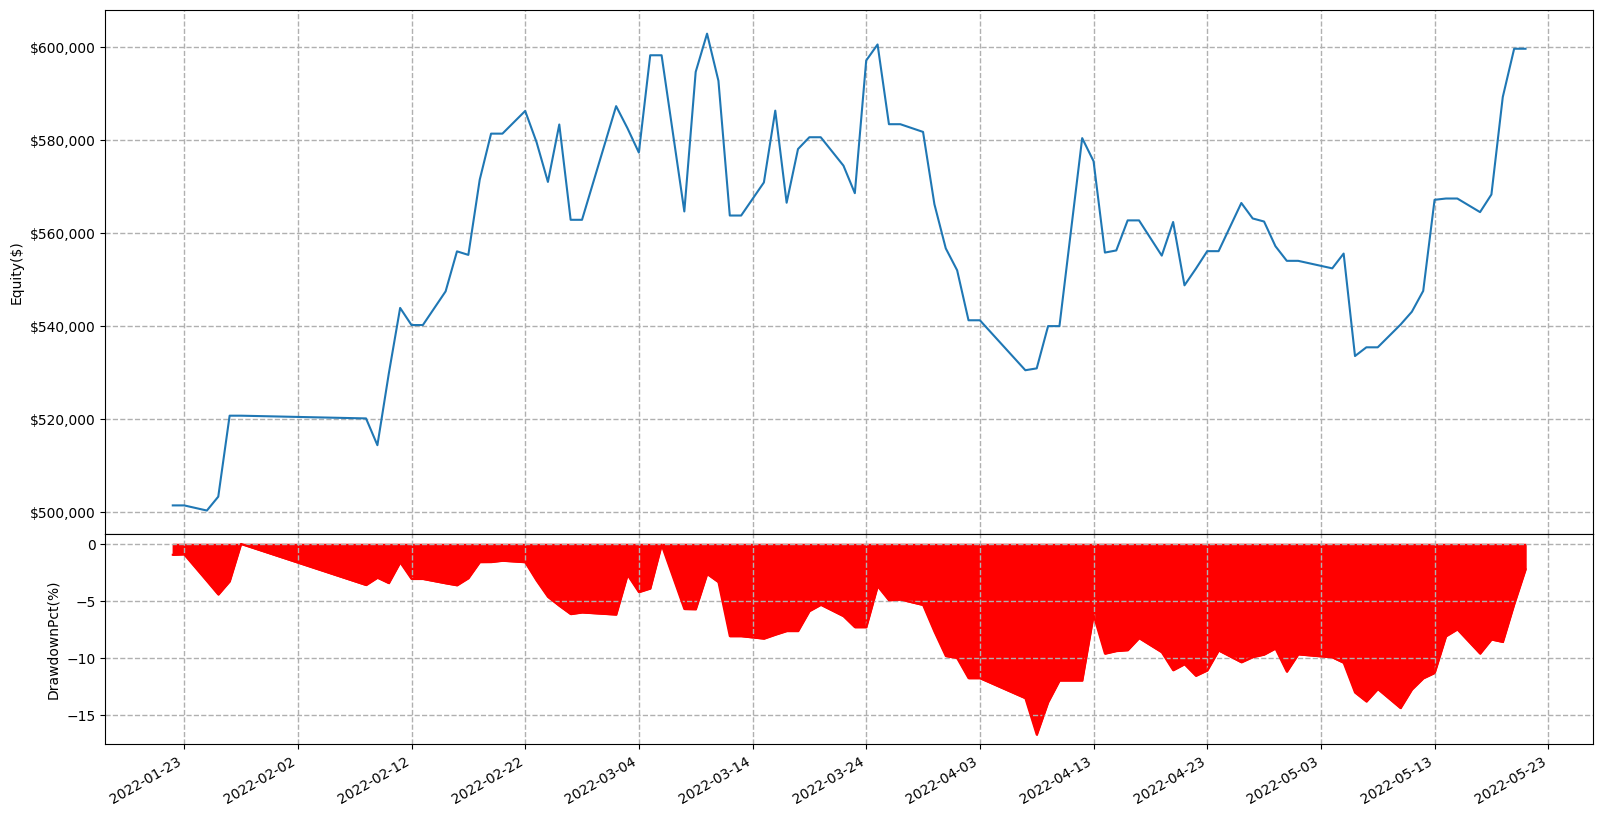

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import StrMethodFormatter
from backtesting.lib import _EQUITY_AGG

equity_data = stats._equity_curve.resample('1D', label='right').agg(_EQUITY_AGG).dropna(how='all')
equity_data['DrawdownPct'] = equity_data['DrawdownPct'].multiply(-100)

f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(19.2, 10.8), gridspec_kw={'height_ratios': [5, 2]})

ax1.grid(linestyle = '--', linewidth = 1)
ax1.plot(equity_data['Equity'])
ax1.set(ylabel="Equity($)")
ax1.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
date_form = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax2.grid(linestyle = '--', linewidth = 1)
ax2.plot(equity_data['DrawdownPct'], color="red")
ax2.set(ylabel="DrawdownPct(%)")
ax2.fill_between(equity_data['DrawdownPct'].index, equity_data['DrawdownPct'], where=(equity_data['DrawdownPct'] <= 0), color="red")   
f.subplots_adjust(hspace=0)
f.autofmt_xdate()

plt.show()

# 最佳化

In [33]:
df = pd.concat([df_train, df_test])
df_in_sample = df[df.index <= '2023-02-28 08:50:00']
bt = Backtest(df_test, ML, cash=500_000, commission=0.000033, hedging=False, exclusive_orders=False, margin=0.05)
stats = bt.optimize(
                    # stop=range(15, 35, 5),
                    # take=range(40, 65, 5),
                    adjust=range(25, 40, 5),
                    after_adjust_stop=range(-25, -35, -5),
                    maximize='Equity Final [$]',
                    )
print(stats.to_string())

init
init
init
init
init
init
init
init
Start                                                   2023-01-30 08:50:00
End                                                     2023-05-20 00:00:00
Duration                                                  109 days 15:10:00
Exposure Time [%]                                                 14.188002
Equity Final [$]                                                807712.8874
Equity Peak [$]                                                 812112.8874
Return [%]                                                        61.542577
Buy & Hold Return [%]                                              4.007239
Return (Ann.) [%]                                                289.082429
Volatility (Ann.) [%]                                            101.048246
Sharpe Ratio                                                       2.860836
Sortino Ratio                                                     26.420038
Calmar Ratio                                    